In [58]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import easyocr
import cv2, queue, threading, time
import glob
import shutil

# Least Confidence Uncertainty a toy example

Here i have trained the model on only 100 annotated images with 20 epochs and got, mAP-60%, and the total number of images was 700, so the rest of the 600 images i have taken as a test unlabelled data, and showed these images to the model and then calculaed the confidence of the model on the 600 images, and if the confiedence is less than the threshold of 70%, then keeping that image aside to annotated it further for model training.

In [59]:
model=torch.hub.load('ultralytics/yolov5','custom',
                     path='/Users/draculalemon/Documents/yolo_wrk/yolov5/runs/train/exp8/weights/best.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/draculalemon/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-12-28 Python-3.9.0 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [172]:
#now we will get the folder path
path="/Users/draculalemon/Downloads/flowers/daisy/"
image_count=[]
for folder_path in os.listdir(path):
    #joining the path
    both_img_path=os.path.join(path,folder_path)
    image_count.append(both_img_path)
print("Total image of daisy :",len(image_count))

Total image of daisy : 665


In [150]:
# training the model first
img_pat="/Users/draculalemon/Downloads/flowers/daisy/4065883015_4bb6010cb7_n.jpg"

In [161]:
result=model(img_pat)
confidence_score=str(result.xyxy)[56:63]
print("Confidence level :",confidence_score)

Confidence level : 0.75248


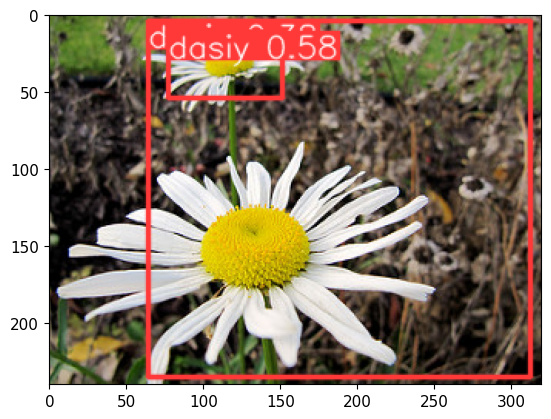

In [152]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

now we will only pass those picture which are having more than 70% of confidence, and the rest of the pic we will annotate it and retrain the model.

In [173]:
re_annotation_list=[]
for pic1 in glob.glob('/Users/draculalemon/Downloads/flowers/daisy/*.jpg'):
    result=model(pic1)
    try:
        confidence_score=(str(result.xyxy)[56:63])
        to_float=float(confidence_score)
        if to_float < 0.71234:
            file_path=pic1
            re_annotation_list.append(pic1)
#             print("this pic has low confidence :",pic1)
    except ValueError:
        pass
print("Count of reannotating image :", len(re_annotation_list))

Count of reannotating image : 383
